In [7]:
x=pow(3,1)

In [8]:
x


3

In [1]:
import os
os.chdir('P:\SAMPLE DATA')

In [5]:
df=pd.read_excel('2017.xlsx')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense

In [65]:
df.head()

CMemNo  payment    InvDate InvPaymentDate            ProdCategory  \
0  617111  success 2011-12-13     2017-12-26  Non HH, mains gas, MOP   
1  617111  success 2012-03-02     2017-12-26  Non HH, mains gas, MOP   
2  617111  success 2012-06-11     2017-12-26  Non HH, mains gas, MOP   
3  617111  success 2012-09-12     2017-12-26  Non HH, mains gas, MOP   
4  617111  success 2012-12-12     2017-12-26  Non HH, mains gas, MOP   

      ProdCode                 ProductAreaName  SuppID  InvNet (SUM)  \
0  MS-ELECTRIC  Non HH Electricity & Mains Gas  S00250       -140.68   
1  MS-ELECTRIC  Non HH Electricity & Mains Gas  S00250       -390.41   
2  MS-ELECTRIC  Non HH Electricity & Mains Gas  S00250       -390.07   
3  MS-ELECTRIC  Non HH Electricity & Mains Gas  S00250       -323.84   
4  MS-ELECTRIC  Non HH Electricity & Mains Gas  S00250       -366.54   

                   Member Type  ... Time for payment first invoice  \
0  Billing Account - Full Plus  ...             2205          -239   
1  Billing Account - Full Plus  ...             2125          -159   
2  Billing Account - Full Plus  ...             2024           -58   
3  Billing Account - Full Plus  ...             1931            35   
4  Billing Account - Full Plus  ...             1840           126   

   payment date  invoiced month  month of payment  year of joning  \
0          1966              12                12            2012   
1          1966               3                12            2012   
2          1966               6                12            2012   
3          1966               9                12            2012   
4          1966              12                12            2012   

   month of joining  day of joining  date of invoicing  date of payment  
0                 8               8                 13               26  
1                 8               8                  2               26  
2                 8               8                 11               26  
3                 8               8                 12               26  
4                 8               8                 12               26  

[5 rows x 22 columns]

<AxesSubplot:>

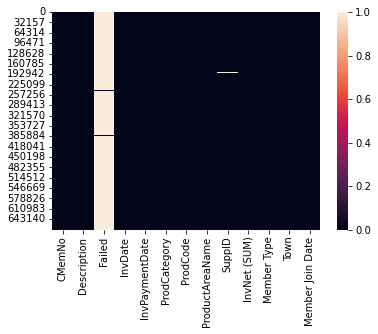

In [5]:
sns.heatmap(df.isnull())

In [21]:
df.shape

(675283, 13)

In [7]:
df.isnull().sum()

CMemNo                 0
Description           26
Failed                 0
InvDate                0
InvPaymentDate         0
ProdCategory           2
ProdCode               2
ProductAreaName        2
SuppID              2039
InvNet (SUM)           2
Member Type            0
Town                   0
Member Join Date       0
dtype: int64

In [7]:
df.dtypes

CMemNo                       int64
Description                 object
Failed                      object
InvDate             datetime64[ns]
InvPaymentDate      datetime64[ns]
ProdCategory                object
ProdCode                    object
ProductAreaName             object
SuppID                      object
InvNet (SUM)               float64
Member Type                 object
Town                        object
Member Join Date    datetime64[ns]
dtype: object

In [7]:
df['Failed']=df['Failed'].fillna('success')

In [11]:
d=df.groupby('Town')["InvNet (SUM)"].sum().reset_index()

In [18]:
d=d.sort_values(by=['InvNet (SUM)'])

In [19]:
d.head(10)

Town  InvNet (SUM)
311           Fearn          8.85
135            Bury         19.28
396   Hertfordshire         20.39
660         Portree         35.90
302  Ettrick Valley         57.47
752         Stanhoe         66.92
395          Heriot         70.04
158        Carnwath         77.00
25             Arne         88.96
441   Isle Of Lewis         96.00

In [16]:
d=d[(d[['InvNet (SUM)']] > 0).all(1)]

In [60]:
df.rename(columns={'InvNet (SUM)':'sales'},inplace=True)

In [63]:
data=df.copy()

In [22]:
import plotly.express as px
fig = px.bar(x='InvDate', y='sales')
fig.show()

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'x' is of type str or int.

In [23]:
df.dtypes

CMemNo                       int64
Description                 object
Failed                      object
InvDate             datetime64[ns]
InvPaymentDate      datetime64[ns]
ProdCategory                object
ProdCode                    object
ProductAreaName             object
SuppID                      object
InvNet (SUM)               float64
Member Type                 object
Town                        object
Member Join Date    datetime64[ns]
dtype: object

In [24]:
import pandas as pd
import plotly.express as px
import random

In [25]:
d = d.groupby(['Town']).size().to_frame().sort_values([0], ascending = True).head(10).reset_index()
d.columns = ['Town', 'sales']

# plotly
fig = px.bar(d, x='Town', y = 'sales')
fig.layout.yaxis.title.text = 'sales'
fig.show()

In [31]:
df['SuppID'].value_counts()

B00271    55245
A00282    39632
B00081    29664
B00008    29161
D00030    20735
          ...  
E00062        1
R00029        1
E00162        1
EX0115        1
EX0097        1
Name: SuppID, Length: 1514, dtype: int64

In [34]:
df

CMemNo                              Description   Failed    InvDate  \
0       617111                     Electricity (Non-HH)  success 2011-12-13   
1       617111                     Electricity (Non-HH)  success 2012-03-02   
2       617111                     Electricity (Non-HH)  success 2012-06-11   
3       617111                     Electricity (Non-HH)  success 2012-09-12   
4       617111                     Electricity (Non-HH)  success 2012-12-12   
...        ...                                      ...      ...        ...   
675278  671300                      Miscellaneous Items  success 2018-02-19   
675279  662718                     Misc Spray Chemicals  success 2018-02-20   
675280  614139                      Livestock Equipment  success 2018-02-21   
675281  693098                        Broadband Service  success 2018-02-21   
675282  693225  Machinery Tools, Vehicle Parts & Spares  success 2018-02-21   

       InvPaymentDate            ProdCategory     ProdCode  \
0          2017-12-26  Non HH, mains gas, MOP  MS-ELECTRIC   
1          2017-12-26  Non HH, mains gas, MOP  MS-ELECTRIC   
2          2017-12-26  Non HH, mains gas, MOP  MS-ELECTRIC   
3          2017-12-26  Non HH, mains gas, MOP  MS-ELECTRIC   
4          2017-12-26  Non HH, mains gas, MOP  MS-ELECTRIC   
...               ...                     ...          ...   
675278     2018-02-26      General - Supplies      MS-MISC   
675279     2018-02-26           Agrochemicals      CH-MISC   
675280     2018-02-26      Livestock Products     SU-LEQIP   
675281     2018-02-26       Fixed & Broadband     MS-BBAND   
675282     2018-02-26     General - Machinery        MC-MS   

                       ProductAreaName  SuppID  InvNet (SUM)  \
0       Non HH Electricity & Mains Gas  S00250       -140.68   
1       Non HH Electricity & Mains Gas  S00250       -390.41   
2       Non HH Electricity & Mains Gas  S00250       -390.07   
3       Non HH Electricity & Mains Gas  S00250       -323.84   
4       Non HH Electricity & Mains Gas  S00250       -366.54   
...                                ...     ...           ...   
675278                General Supplies  M00115       -806.08   
675279                 Crop Protection  D00072      -1990.00   
675280              Livestock Products  T00162       -210.00   
675281                        Telecoms  I00020        -44.64   
675282                       Machinery  L00005       -141.79   

                        Member Type           Town Member Join Date  
0       Billing Account - Full Plus       Thetford       2012-08-08  
1       Billing Account - Full Plus       Thetford       2012-08-08  
2       Billing Account - Full Plus       Thetford       2012-08-08  
3       Billing Account - Full Plus       Thetford       2012-08-08  
4       Billing Account - Full Plus       Thetford       2012-08-08  
...                             ...            ...              ...  
675278                         Full  North Walsham       1978-06-09  
675279                         Full     Kings Lynn       2007-10-31  
675280                         Full         Belper       2017-11-08  
675281                         Full        Norwich       1985-07-11  
675282                         Full     Kings Lynn       1993-09-20  

[675283 rows x 13 columns]

In [26]:
df['Time for payment'] = (df['InvPaymentDate'] - df['InvDate']).dt.days

In [27]:
df.drop('Description', axis=1, inplace=True)

In [28]:
df.dropna(inplace=True)

In [29]:
df.shape

(673242, 13)

In [30]:
df.rename(columns={'Failed':'payment'}, inplace=True)

In [31]:
df['payment']=df['payment'].fillna('success')

In [32]:
#df['Description'].unique()

In [33]:
df['ProdCategory'].unique()

array(['Non HH, mains gas, MOP', 'Liquid', 'Feed', 'General - Supplies',
       'Electricity HH', 'Vet fees & Animal Health / Semen',
       'Renewable Services', 'Hire', 'General - Machinery', 'Accounts',
       'Mobile', 'Building Materials', 'Agrochemicals',
       'Livestock Products', 'LPG & Solid fuels', 'Fixed & Broadband',
       'Hardware', 'General Services', 'Fertiliser', 'Non Levy', 'Seed',
       'Tyres', 'Insurance', 'Build Materials Non Levy', 'Fuel Cards',
       'Charge card', 'Agrochemicals Non Levy', 'Capital', 'Rodenticides',
       'Labour', 'Rebates to Members', 'Liquid 10,000Ltrs+',
       'Tractor Hire', 'Seed Non Levy', 'General Supplies Non Levy'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x28b5a76c640>,
 [Text(-0.016897223601335835, -1.0998702122680506, 'success'),
  Text(0.01843338749665814, 1.1998584125743328, 'Failed')],
 [Text(-0.009216667418910455, -0.5999292066916639, '99.5%'),
  Text(0.01075280937305058, 0.6999174073350275, '0.5%')])

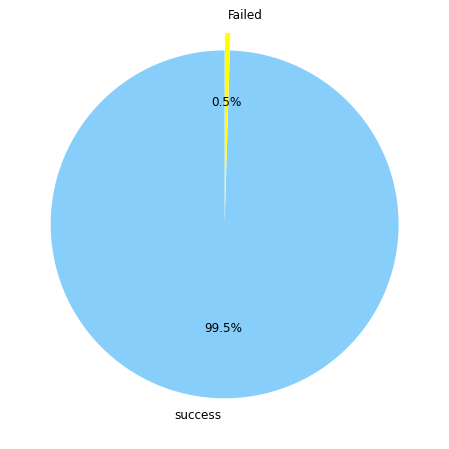

In [42]:
plt.rcParams['figure.figsize']=8,8
labels=df['payment'].value_counts().index.tolist()
sizes=df['payment'].value_counts().tolist()
explode=(0,0.10)
colors=['lightskyblue','yellow']
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize':12})

In [34]:
df['ProductAreaName'].groupby(df['payment']).describe()a

count unique        top    freq
payment                                  
Failed     3292     20  Machinery     796
success  669950     21  Machinery  149801

In [35]:
df['Town'].groupby(df['payment']).describe()

count unique      top    freq
payment                                
Failed     3292     44  Norwich     799
success  669950    904  Norwich  164626

In [36]:
df['payment'].groupby(df['Town']).describe()

count unique      top  freq
Town                                      
0                  4      1  success     4
69003 Lyon        11      1  success    11
70 Orford Road    72      1  success    72
9050 AB Steins     1      1  success     1
Aberdeen           3      1  success     3
...              ...    ...      ...   ...
Wymondham       9274      2  success  9226
Yaxham            56      1  success    56
Yelvertoft       200      1  success   200
Yeovil          1359      2  success  1322
York            2824      1  success  2824

[904 rows x 4 columns]

In [37]:
df['ProductAreaName'].groupby(df['Town']).describe()

count unique                               top  freq
Town                                                               
0                  4      1  Feed & Animal Health & Vets Fees     4
69003 Lyon        11      1                Non Service Charge    11
70 Orford Road    72      8                   Crop Protection    50
9050 AB Steins     1      1                Non Service Charge     1
Aberdeen           3      2                Non Service Charge     2
...              ...    ...                               ...   ...
Wymondham       9274     20                         Machinery  1952
Yaxham            56      7                Non Service Charge    32
Yelvertoft       200     10                         Machinery    45
Yeovil          1359     18                Non Service Charge   309
York            2824     19                   Crop Protection   994

[904 rows x 4 columns]

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='payment', ylabel='count'>

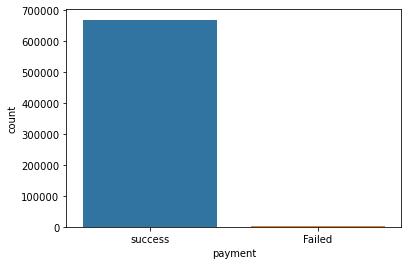

In [38]:
#count plot for declined payment

df['payment']=df.payment.replace([1,0],['success','Failed'])
paymentrate=df['payment']
sns.countplot(paymentrate)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProdCategory', ylabel='count'>

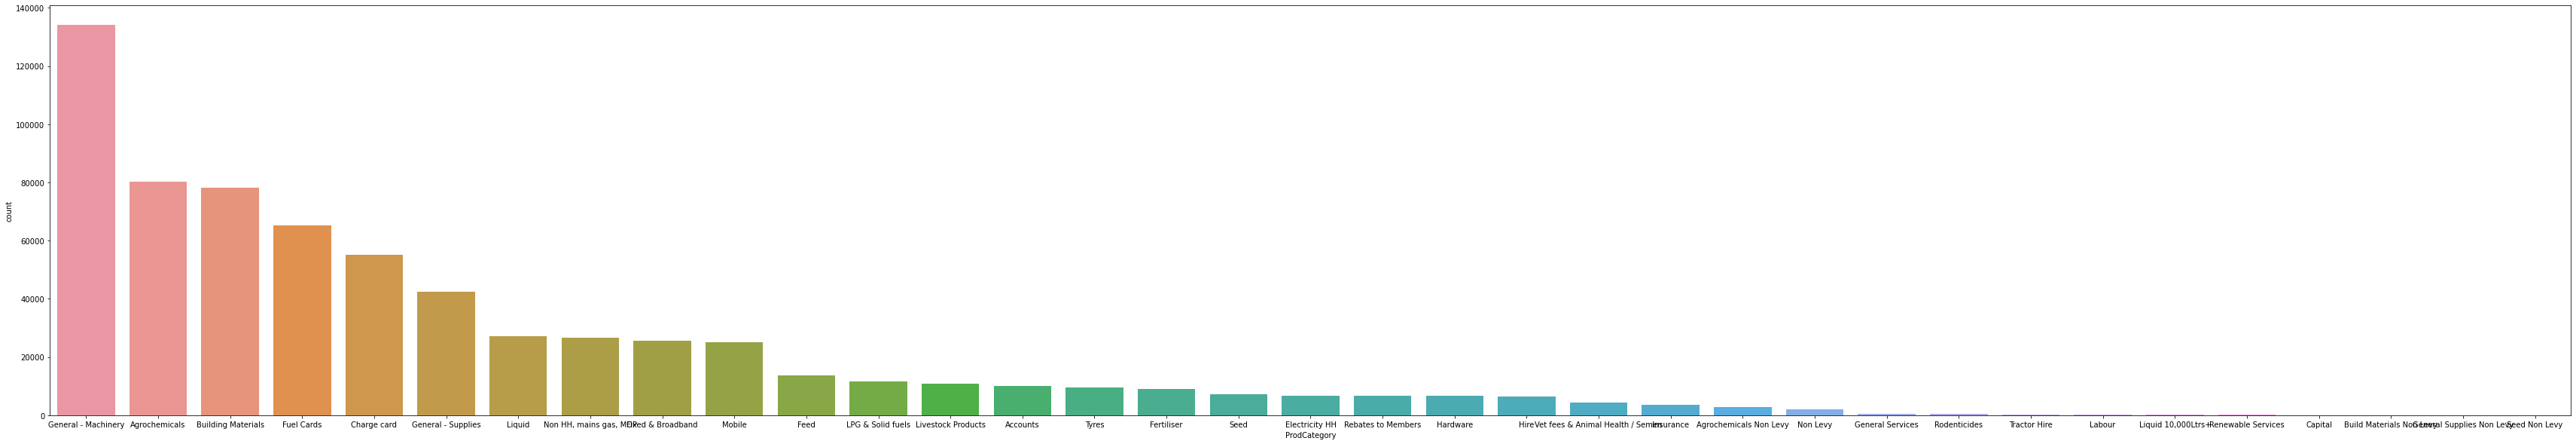

In [122]:
#count of total invoice in each product category
plt.figure(figsize=(60,10))
paymentrate=df['ProdCategory']
sns.countplot(paymentrate,order = df['ProdCategory'].value_counts().index)


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProductAreaName', ylabel='count'>

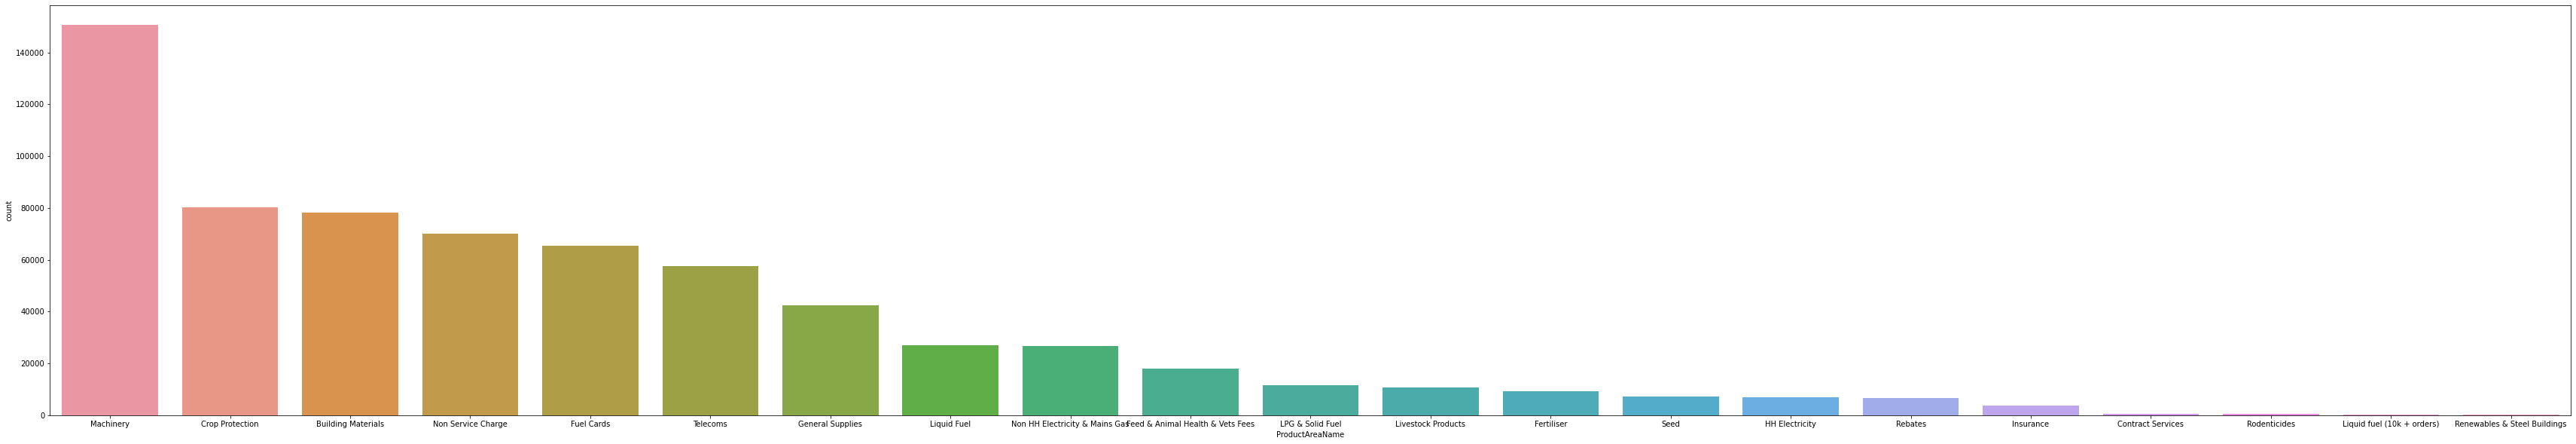

In [123]:
#count of total invoice in each product Areaname
plt.figure(figsize=(60,10))
paymentrate=df['ProductAreaName']
sns.countplot(paymentrate, order = df['ProductAreaName'].value_counts().index)

In [52]:
df.columns


Index(['CMemNo', 'payment', 'InvDate', 'InvPaymentDate', 'ProdCategory',
       'ProdCode', 'ProductAreaName', 'SuppID', 'InvNet (SUM)', 'Member Type',
       'Town', 'Member Join Date', 'Time for payment'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Town'>

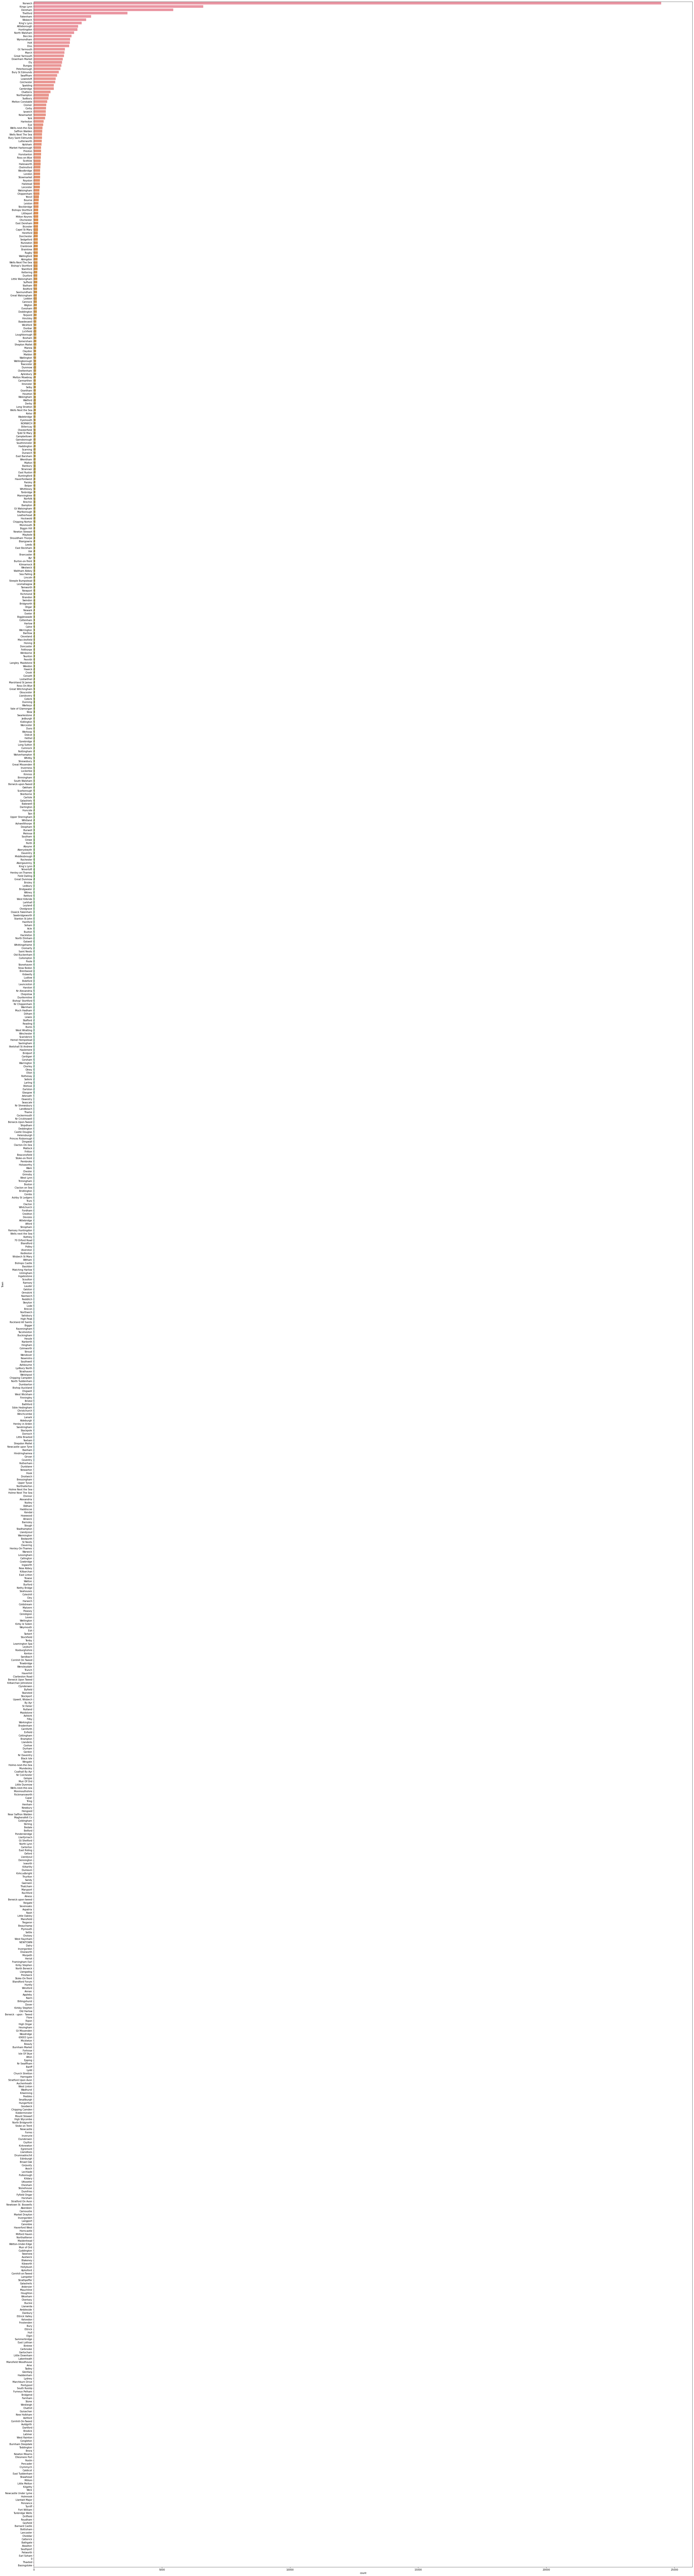

In [125]:
#count of invoices over each town
plt.figure(figsize=(50,200))
paymentrate=subset['Town']
sns.countplot(y=paymentrate, order = subset['Town'].value_counts().index, orient="H")

<AxesSubplot:xlabel='count', ylabel='Member Type'>

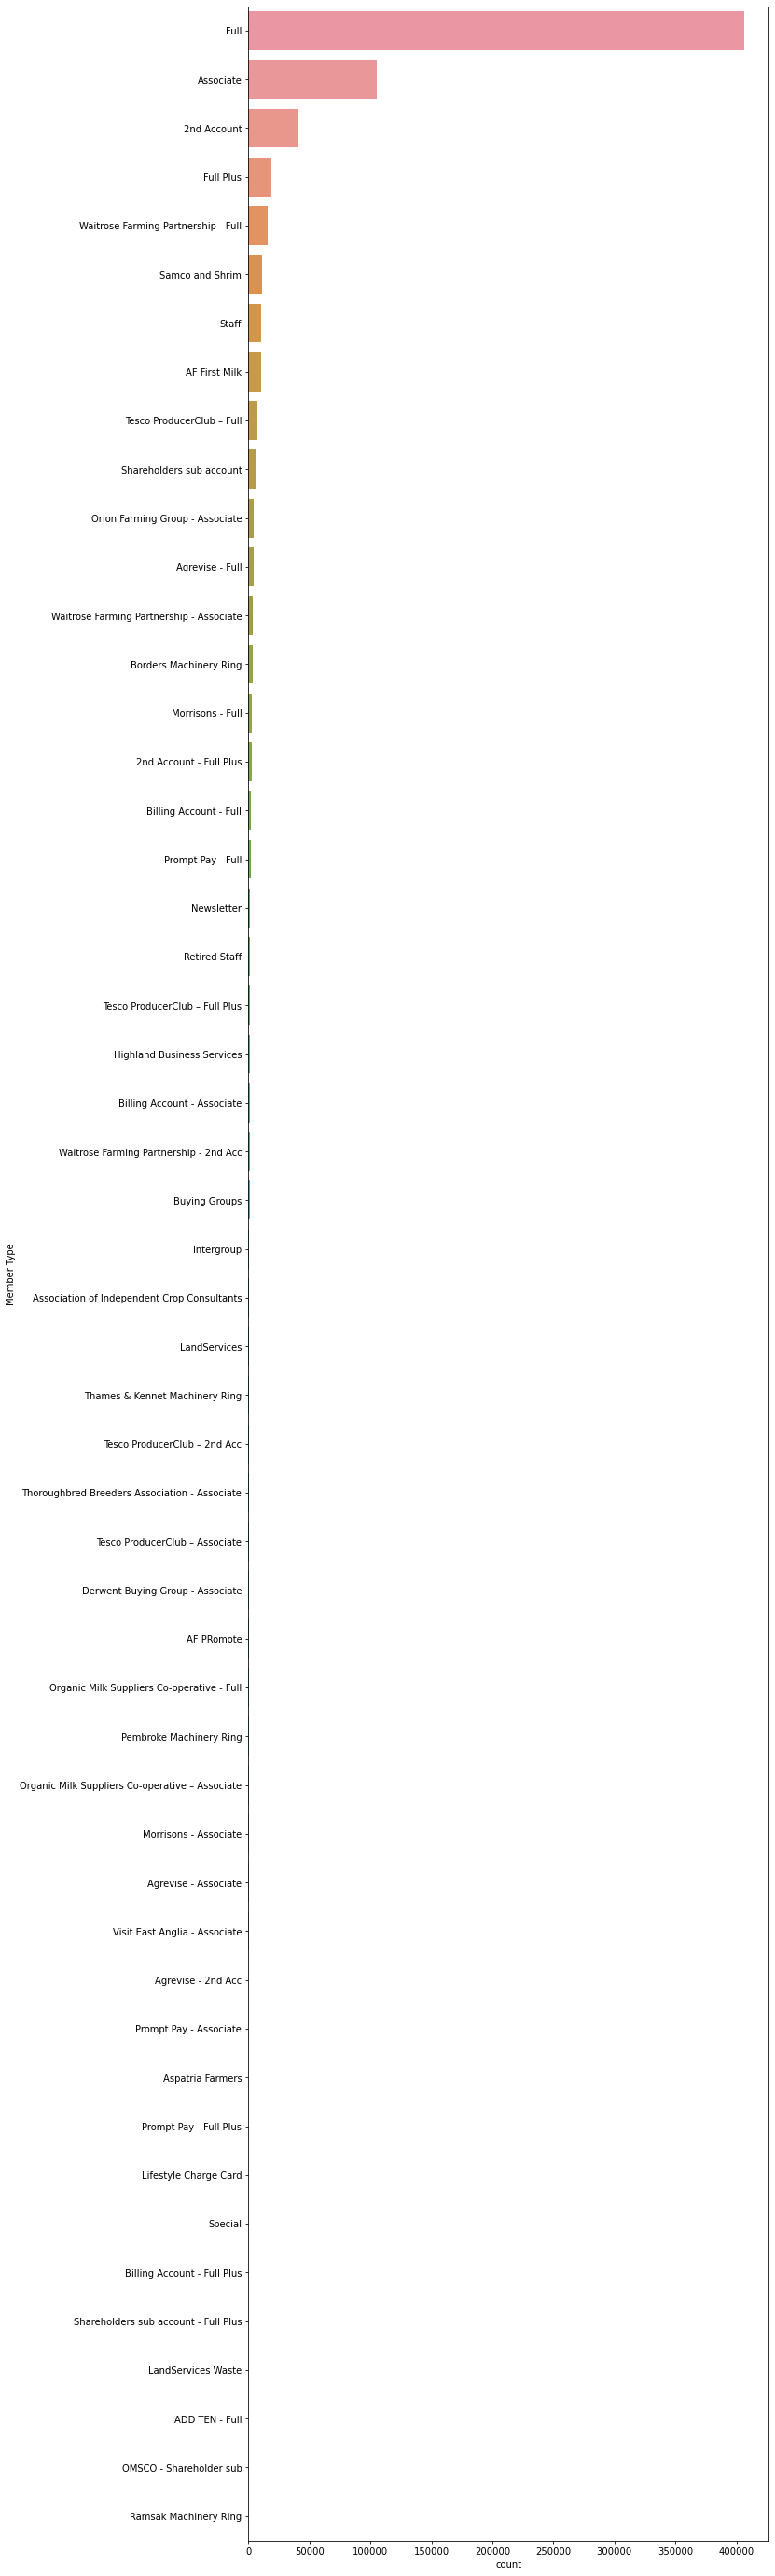

In [131]:
plt.figure(figsize=(10,50))
paymentrate=df['Member Type']
sns.countplot(y=paymentrate, order = df['Member Type'].value_counts().index)

In [39]:
df.groupby(["payment", "Member Type"])["ProductAreaName"].agg(["value_counts"])

value_counts
payment Member Type                         ProductAreaName                           
Failed  2nd Account                         Building Materials                      22
                                            LPG & Solid Fuel                        11
                                            Crop Protection                          5
                                            General Supplies                         5
                                            Machinery                                4
...                                                                                ...
success Waitrose Farming Partnership - Full LPG & Solid Fuel                        62
                                            Liquid fuel (10k + orders)              27
                                            Contract Services                       17
                                            Rodenticides                            14
                                            Renewables & Steel Buildings             1

[713 rows x 1 columns]

In [40]:
county=df[df['payment']=='Failed'].groupby(['Town']).size().reset_index(name='count')

In [41]:
county

Town  count
0          Basildon     43
1           Beccles     51
2           Bedford      6
3          Bicester    238
4   Blandford Forum      2
5            Bungay      8
6   Bury St Edmunds     20
7    Clacton on Sea      6
8             Crewe     16
9           Dereham    632
10             Diss    161
11     East Dereham      8
12              Ely     38
13         Fakenham     99
14         Grantham      7
15      Gt Yarmouth     27
16       Halesworth     27
17             Holt      9
18          Hoveton     26
19       Huntingdon    101
20       Kidlington     15
21      King's Lynn    152
22       Kings Lynn     45
23        Leicester      1
24           London     15
25        Lowestoft     38
26      Lutterworth     14
27            Manea    143
28            March     10
29    North Walsham     14
30          Norwich    799
31          Outwell     13
32     Peterborough    112
33         Shropham     11
34         Spalding      3
35      Stadhampton      3
36         Stamford     34
37       Stowmarket     12
38          Sudbury     10
39         Thetford     27
40       Winchcombe      1
41          Wisbech    210
42        Wymondham     48
43           Yeovil     37

In [42]:
county=df[df['payment']=='success'].groupby(['Town']).size().reset_index(name='count')

In [43]:
county

Town  count
0                 0      4
1        69003 Lyon     11
2    70 Orford Road     72
3    9050 AB Steins      1
4          Aberdeen      3
..              ...    ...
899       Wymondham   9226
900          Yaxham     56
901      Yelvertoft    200
902          Yeovil   1322
903            York   2824

[904 rows x 2 columns]

In [44]:
subset = df.sample(n=100000)

In [45]:
subset.reset_index(inplace=True)

In [46]:
subset.drop('index', axis=1, inplace=True)

In [47]:
subset.shape

(100000, 13)

In [48]:
df1=subset.copy()

In [49]:
df.dtypes

CMemNo                       int64
payment                     object
InvDate             datetime64[ns]
InvPaymentDate      datetime64[ns]
ProdCategory                object
ProdCode                    object
ProductAreaName             object
SuppID                      object
InvNet (SUM)               float64
Member Type                 object
Town                        object
Member Join Date    datetime64[ns]
Time for payment             int64
dtype: object

In [50]:
df2=df1.copy()

In [51]:
from datetime import datetime

In [52]:
df['Time for payment'] = (df['InvPaymentDate'] - df['InvDate']).dt.days

In [30]:
#df2.drop(['clean_text','index'],axis=1, inplace=True)

In [31]:
#df2.reset_index(inplace=True)

In [32]:
#train_data=df2.iloc[:80000,:]

In [33]:
#test_data = df2.drop(train_data.index)

In [35]:
#df2.drop(['Description','SuppID'],axis=1, inplace=True)

In [151]:
df.isnull().sum()

CMemNo              0
payment             0
InvDate             0
InvPaymentDate      0
ProdCategory        0
ProdCode            0
ProductAreaName     0
InvNet (SUM)        0
Member Type         0
Town                0
Member Join Date    0
Time for payment    0
SuppID              0
dtype: int64

In [58]:
#import plotly.express as px

In [59]:
#px.choropleth(county,
                    #locations = "country",
                    #color= "count", 
                    #hover_name= "country", # column to add to hover information
                    #color_continuous_scale=px.colors.sequential.Plasma,
                    #title="f visitors")

In [53]:
#day diff for the first payment is member join date to the invdate
df['first invoice']=(df['InvDate']-df['Member Join Date']).dt.days

In [54]:
#day diff between the payment made and membershit join date is considered to be the payment date
df['payment date']=(df['InvPaymentDate']-df['Member Join Date']).dt.days

In [55]:
#month of the invoice 
df["invoiced month"] = pd.to_datetime(df["InvDate"], format = "%d/%m/%Y").dt.month

In [56]:
#payment month
df['month of payment']=pd.to_datetime(df["InvPaymentDate"], format="%d/%m/%Y").dt.month

In [57]:
#members joined year and month
df['year of joning']=pd.to_datetime(df["Member Join Date"], format="%d/%m/%Y").dt.year
df['month of joining']=pd.to_datetime(df["Member Join Date"], format="%d/%m/%Y").dt.month
df['day of joining']=pd.to_datetime(df["Member Join Date"], format="%d/%m/%Y").dt.day

In [58]:
df['date of invoicing']=pd.to_datetime(df["InvDate"], format="%d/%m/%Y").dt.day

In [59]:
df['date of payment']=pd.to_datetime(df["InvPaymentDate"], format="%d/%m/%Y").dt.day

<AxesSubplot:xlabel='count', ylabel='year of joning'>

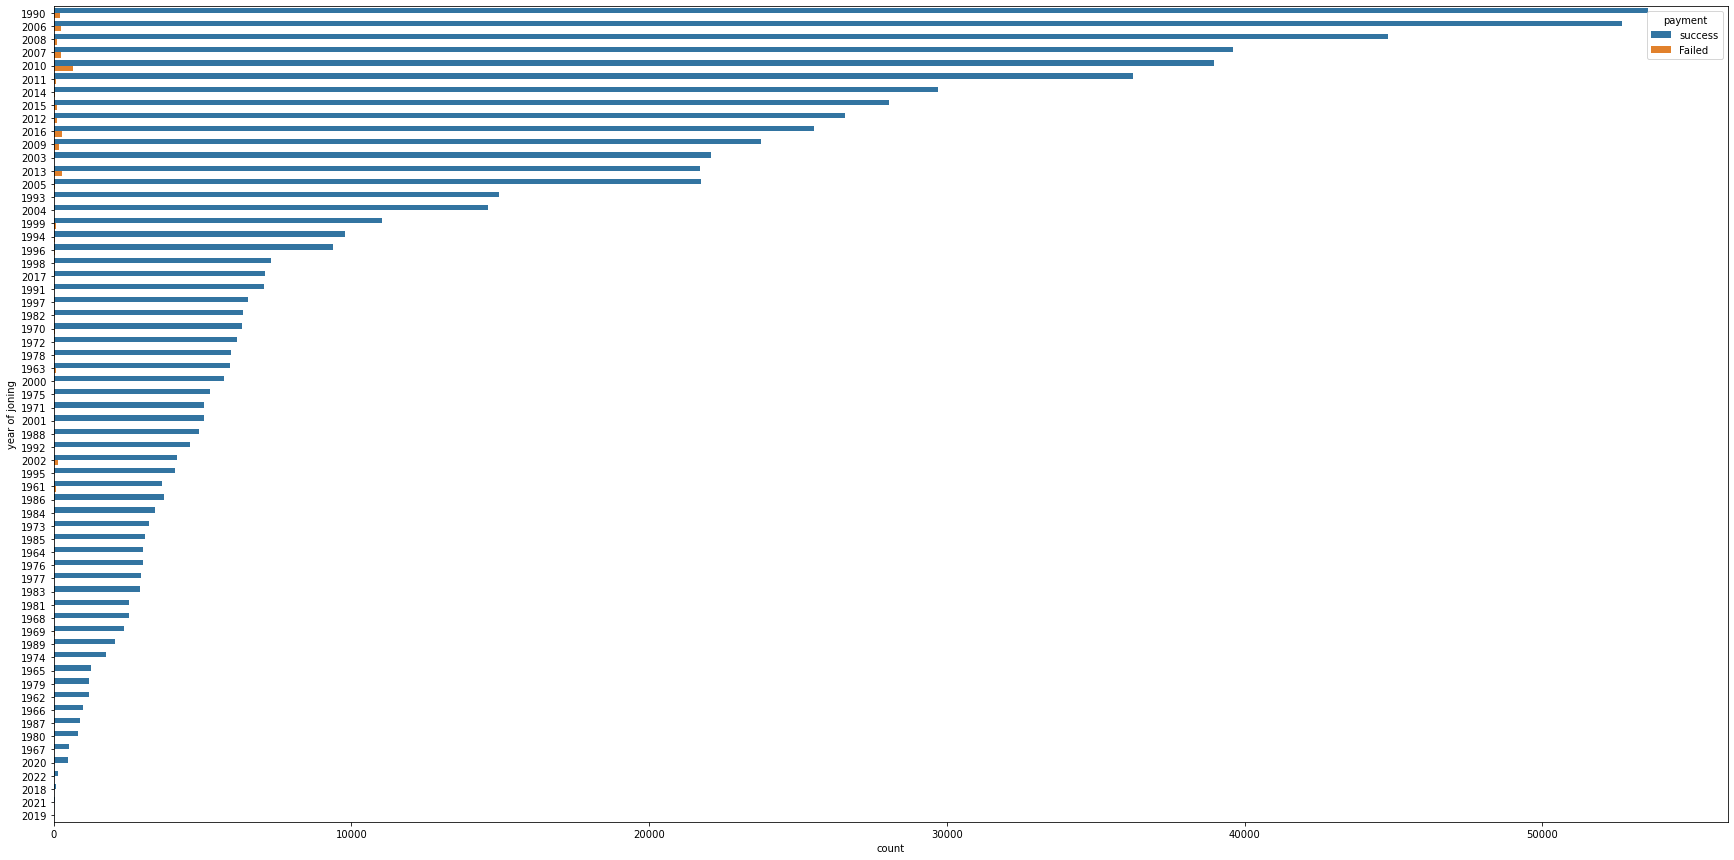

In [60]:
plt.figure(figsize=(30,15))
sns.countplot(y='year of joning', hue='payment', data=df,order = df['year of joning'].value_counts().index)

In [70]:
c=county.sort_values(by=['count']).reset_index()

In [72]:
c.drop('index',axis=1,inplace=True)

In [73]:
c

year of joning  count
0             2004      8
1             2001      8
2             1991     15
3             2017     16
4             1988     18
5             2003     19
6             1971     22
7             1992     25
8             1978     27
9             2005     35
10            1996     38
11            1970     40
12            1994     42
13            1969     53
14            2014     60
15            1963     66
16            1999     68
17            1961     80
18            2011     81
19            2015    114
20            2008    117
21            2012    127
22            2002    152
23            2009    178
24            1990    216
25            2006    229
26            2007    250
27            2016    273
28            2013    281
29            2010    634

In [66]:
county=df[df['payment']=='Failed'].groupby(['year of joning']).size().reset_index(name='count')

In [168]:
df['Member Type'].value_counts()

Full                                               406147
Associate                                          104856
2nd Account                                         40573
Full Plus                                           18875
Waitrose Farming Partnership - Full                 16140
Samco and Shrim                                     11400
Staff                                               10339
AF First Milk                                       10163
Tesco ProducerClub – Full                            7533
Shareholders sub account                             5766
Orion Farming Group - Associate                      4322
Agrevise - Full                                      4056
Waitrose Farming Partnership - Associate             3951
Borders Machinery Ring                               3548
Morrisons - Full                                     3106
2nd Account - Full Plus                              2603
Billing Account - Full                               2178
Prompt Pay - F

In [5]:
df.drop(['InvDate','InvPaymentDate','ProdCode','Member Join Date'], axis=1, inplace=True)

NameError: name 'df' is not defined

In [171]:
df.dtypes

CMemNo                 int64
payment               object
ProdCategory          object
ProductAreaName       object
InvNet (SUM)         float64
Member Type           object
Town                  object
Time for payment       int64
SuppID                object
first invoice          int64
payment date           int64
invoiced month         int64
month of payment       int64
year of joning         int64
month of joining       int64
day of joining         int64
date of invoicing      int64
date of payment        int64
dtype: object

In [3]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [4]:
# define data
data = asarray(df1['Town']).reshape(-1,1)
print(data)


NameError: name 'df1' is not defined

In [1]:
# define ordinal encoding
encoder = OrdinalEncoder()

NameError: name 'OrdinalEncoder' is not defined

In [180]:
# transform data
result = encoder.fit_transform(data)
print(result)

[[212.]
 [725.]
 [668.]
 ...
 [770.]
 [754.]
 [ 47.]]


In [181]:
result=pd.DataFrame(result)

In [182]:
df2=pd.concat([df2,result], axis=1)

In [185]:
df2.columns = [*df2.columns[:-1], 'Towns']

In [191]:
df2

CMemNo  payment    InvDate InvPaymentDate            ProdCategory  \
0      664157  success 2017-06-02     2017-07-28           Agrochemicals   
1      671762  success 2017-02-16     2017-03-16     General - Machinery   
2      663290  success 2018-01-11     2018-02-26      Livestock Products   
3      693336  success 2017-02-28     2017-03-26     General - Machinery   
4      663973  success 2017-05-02     2017-05-26  Non HH, mains gas, MOP   
...       ...      ...        ...            ...                     ...   
99995  662629  success 2017-04-06     2017-05-26                Accounts   
99996  614315  success 2017-04-30     2017-05-26      Rebates to Members   
99997  693352  success 2017-08-31     2017-09-26     General - Machinery   
99998  693267  success 2018-01-31     2018-02-28              Fuel Cards   
99999  671816  success 2017-03-02     2017-04-02     General - Machinery   

          ProdCode                 ProductAreaName  InvNet (SUM)  Member Type  \
0        CH-CERI10                 Crop Protection        307.93    Associate   
1            MC-MS                       Machinery         11.82         Full   
2         SU-LEQIP              Livestock Products         58.80         Full   
3        MC-INDGAS                       Machinery        200.46         Full   
4      MS-ELECTRIC  Non HH Electricity & Mains Gas        130.26  2nd Account   
...            ...                             ...           ...          ...   
99995  AF-SUBSFULL              Non Service Charge        -50.00         Full   
99996       MS-REB                         Rebates        -40.07         Full   
99997        MC-MS                       Machinery         18.50         Full   
99998      FL-CARD                      Fuel Cards         72.70         Full   
99999        MC-MS                       Machinery        114.26         Full   

                   Town Member Join Date  Time for payment  SuppID  \
0        Great Yarmouth       2013-02-06                56  B00008   
1               Norwich       1998-02-22                28  L00003   
2      Melton Constable       2009-12-08                46  D00021   
3               Dereham       1993-04-22                26  A00115   
4               Norwich       2012-07-06                24  S00214   
...                 ...              ...               ...     ...   
99995           Norwich       2007-07-06                50  A00245   
99996             Dover       2016-09-13                26  A00249   
99997          Swaffham       1977-02-24                26  B00081   
99998               Eye       2000-03-16                28  A00282   
99999           Norwich       2000-03-21                31  D00030   

       first invoice  
0               1577  
1               6934  
2               2956  
3               8713  
4               1761  
...              ...  
99995           3562  
99996            229  
99997          14798  
99998           6530  
99999           6190  

[100000 rows x 14 columns]

In [190]:
df2.drop('Towns',axis=1, inplace=True)

In [62]:
#df2['Town'].value_counts()

In [167]:
#fe = df2.groupby("Town").size()

In [168]:
#fe_ = fe/len(df2)

In [64]:
#df2["town freq"] = df2["Town"].map(fe_).round(2)
#df2

In [63]:
#df2['Member Type'].value_counts()

In [192]:
cusdata=df2[["ProdCategory"]]

cusdata=pd.get_dummies(cusdata, drop_first=True)

cusdata.head()

ProdCategory_Agrochemicals  ProdCategory_Agrochemicals Non Levy  \
0                           1                                    0   
1                           0                                    0   
2                           0                                    0   
3                           0                                    0   
4                           0                                    0   

   ProdCategory_Build Materials Non Levy  ProdCategory_Building Materials  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   

   ProdCategory_Capital  ProdCategory_Charge card  \
0                     0                         0   
1                     0                         0   
2                     0                         0   
3                     0                         0   
4                     0                         0   

   ProdCategory_Electricity HH  ProdCategory_Feed  ProdCategory_Fertiliser  \
0                            0                  0                        0   
1                            0                  0                        0   
2                            0                  0                        0   
3                            0                  0                        0   
4                            0                  0                        0   

   ProdCategory_Fixed & Broadband  ...  ProdCategory_Non HH, mains gas, MOP  \
0                               0  ...                                    0   
1                               0  ...                                    0   
2                               0  ...                                    0   
3                               0  ...                                    0   
4                               0  ...                                    1   

   ProdCategory_Non Levy  ProdCategory_Rebates to Members  \
0                      0                                0   
1                      0                                0   
2                      0                                0   
3                      0                                0   
4                      0                                0   

   ProdCategory_Renewable Services  ProdCategory_Rodenticides  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   

   ProdCategory_Seed  ProdCategory_Seed Non Levy  ProdCategory_Tractor Hire  \
0                  0                           0                          0   
1                  0                           0                          0   
2                  0                           0                          0   
3                  0                           0                          0   
4                  0                           0                          0   

   ProdCategory_Tyres  ProdCategory_Vet fees & Animal Health / Semen  
0                   0                                              0  
1                   0                                              0  
2                   0                                              0  
3                   0                                              0  
4                   0                                              0  

[5 rows x 34 columns]

In [193]:
prodarea=df2[["ProductAreaName"]]

prodarea=pd.get_dummies(prodarea, drop_first=True)

prodarea.head()

ProductAreaName_Contract Services  ProductAreaName_Crop Protection  \
0                                  0                                1   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   

   ProductAreaName_Feed & Animal Health & Vets Fees  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   ProductAreaName_Fertiliser  ProductAreaName_Fuel Cards  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   ProductAreaName_General Supplies  ProductAreaName_HH Electricity  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   ProductAreaName_Insurance  ProductAreaName_LPG & Solid Fuel  \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0   
3                          0                                 0   
4                          0                                 0   

   ProductAreaName_Liquid Fuel  ProductAreaName_Liquid fuel (10k + orders)  \
0                            0                                           0   
1                            0                                           0   
2                            0                                           0   
3                            0                                           0   
4                            0                                           0   

   ProductAreaName_Livestock Products  ProductAreaName_Machinery  \
0                                   0                          0   
1                                   0                          1   
2                                   1                          0   
3                                   0                          1   
4                                   0                          0   

   ProductAreaName_Non HH Electricity & Mains Gas  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

   ProductAreaName_Non Service Charge  ProductAreaName_Rebates  \
0                                   0                        0   
1                                   0                        0   
2                                   0                        0   
3                                   0                        0   
4                                   0                        0   

   ProductAreaName_Renewables & Steel Buildings  ProductAreaName_Rodenticides  \
0                                             0                             0   
1                                             0                             0   
2                                             0                             0   
3                                             0                             0   
4                                          

In [194]:
df4 = pd.concat([df2, cusdata, prodarea], axis = 1)

In [195]:
df4

CMemNo  payment    InvDate InvPaymentDate            ProdCategory  \
0      664157  success 2017-06-02     2017-07-28           Agrochemicals   
1      671762  success 2017-02-16     2017-03-16     General - Machinery   
2      663290  success 2018-01-11     2018-02-26      Livestock Products   
3      693336  success 2017-02-28     2017-03-26     General - Machinery   
4      663973  success 2017-05-02     2017-05-26  Non HH, mains gas, MOP   
...       ...      ...        ...            ...                     ...   
99995  662629  success 2017-04-06     2017-05-26                Accounts   
99996  614315  success 2017-04-30     2017-05-26      Rebates to Members   
99997  693352  success 2017-08-31     2017-09-26     General - Machinery   
99998  693267  success 2018-01-31     2018-02-28              Fuel Cards   
99999  671816  success 2017-03-02     2017-04-02     General - Machinery   

          ProdCode                 ProductAreaName  InvNet (SUM)  Member Type  \
0        CH-CERI10                 Crop Protection        307.93    Associate   
1            MC-MS                       Machinery         11.82         Full   
2         SU-LEQIP              Livestock Products         58.80         Full   
3        MC-INDGAS                       Machinery        200.46         Full   
4      MS-ELECTRIC  Non HH Electricity & Mains Gas        130.26  2nd Account   
...            ...                             ...           ...          ...   
99995  AF-SUBSFULL              Non Service Charge        -50.00         Full   
99996       MS-REB                         Rebates        -40.07         Full   
99997        MC-MS                       Machinery         18.50         Full   
99998      FL-CARD                      Fuel Cards         72.70         Full   
99999        MC-MS                       Machinery        114.26         Full   

                   Town  ... ProductAreaName_Liquid fuel (10k + orders)  \
0        Great Yarmouth  ...                                          0   
1               Norwich  ...                                          0   
2      Melton Constable  ...                                          0   
3               Dereham  ...                                          0   
4               Norwich  ...                                          0   
...                 ...  ...                                        ...   
99995           Norwich  ...                                          0   
99996             Dover  ...                                          0   
99997          Swaffham  ...                                          0   
99998               Eye  ...                                          0   
99999           Norwich  ...                                          0   

       ProductAreaName_Livestock Products ProductAreaName_Machinery  \
0                                       0                         0   
1                                       0                         1   
2                                       1                         0   
3                                       0                         1   
4                                       0                         0   
...                                   ...                       ...   
99995                                   0                         0   
99996                                   0                         0   
99997                                   0                         1   
99998                                   0                         0   
99999                                   0                         1   

       ProductAreaName_Non HH Electricity & Mains Gas  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   1   
...                      

In [196]:
memtype=df2[["Member Type"]]

memtype=pd.get_dummies(memtype, drop_first=True)

memtype.head()

Member Type_2nd Account - Full Plus  Member Type_ADD TEN - Full  \
0                                    0                           0   
1                                    0                           0   
2                                    0                           0   
3                                    0                           0   
4                                    0                           0   

   Member Type_AF First Milk  Member Type_AF PRomote  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   Member Type_Agrevise - 2nd Acc  Member Type_Agrevise - Associate  \
0                               0                                 0   
1                               0                                 0   
2                               0                                 0   
3                               0                                 0   
4                               0                                 0   

   Member Type_Agrevise - Full  Member Type_Aspatria Farmers  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   

   Member Type_Associate  \
0                      1   
1                      0   
2                      0   
3                      0   
4                      0   

   Member Type_Association of Independent Crop Consultants  ...  \
0                                                  0        ...   
1                                                  0        ...   
2                                                  0        ...   
3                                                  0        ...   
4                                                  0        ...   

   Member Type_Tesco ProducerClub – 2nd Acc  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Member Type_Tesco ProducerClub – Associate  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Member Type_Tesco ProducerClub – Full  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Member Type_Tesco ProducerClub – Full Plus  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Member Type_Thames & Kennet Machinery Ring  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Member Type_Thoroughbred Breeders Association - Associate  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   Member Type_Visit East Anglia - Associat

In [197]:
df4["payment"].replace({"success":1, "Failed": 0}, inplace=True)

In [199]:
df4

CMemNo  payment    InvDate InvPaymentDate            ProdCategory  \
0      664157        1 2017-06-02     2017-07-28           Agrochemicals   
1      671762        1 2017-02-16     2017-03-16     General - Machinery   
2      663290        1 2018-01-11     2018-02-26      Livestock Products   
3      693336        1 2017-02-28     2017-03-26     General - Machinery   
4      663973        1 2017-05-02     2017-05-26  Non HH, mains gas, MOP   
...       ...      ...        ...            ...                     ...   
99995  662629        1 2017-04-06     2017-05-26                Accounts   
99996  614315        1 2017-04-30     2017-05-26      Rebates to Members   
99997  693352        1 2017-08-31     2017-09-26     General - Machinery   
99998  693267        1 2018-01-31     2018-02-28              Fuel Cards   
99999  671816        1 2017-03-02     2017-04-02     General - Machinery   

          ProdCode                 ProductAreaName  InvNet (SUM)  Member Type  \
0        CH-CERI10                 Crop Protection        307.93    Associate   
1            MC-MS                       Machinery         11.82         Full   
2         SU-LEQIP              Livestock Products         58.80         Full   
3        MC-INDGAS                       Machinery        200.46         Full   
4      MS-ELECTRIC  Non HH Electricity & Mains Gas        130.26  2nd Account   
...            ...                             ...           ...          ...   
99995  AF-SUBSFULL              Non Service Charge        -50.00         Full   
99996       MS-REB                         Rebates        -40.07         Full   
99997        MC-MS                       Machinery         18.50         Full   
99998      FL-CARD                      Fuel Cards         72.70         Full   
99999        MC-MS                       Machinery        114.26         Full   

                   Town  ... ProductAreaName_Liquid fuel (10k + orders)  \
0        Great Yarmouth  ...                                          0   
1               Norwich  ...                                          0   
2      Melton Constable  ...                                          0   
3               Dereham  ...                                          0   
4               Norwich  ...                                          0   
...                 ...  ...                                        ...   
99995           Norwich  ...                                          0   
99996             Dover  ...                                          0   
99997          Swaffham  ...                                          0   
99998               Eye  ...                                          0   
99999           Norwich  ...                                          0   

       ProductAreaName_Livestock Products ProductAreaName_Machinery  \
0                                       0                         0   
1                                       0                         1   
2                                       1                         0   
3                                       0                         1   
4                                       0                         0   
...                                   ...                       ...   
99995                                   0                         0   
99996                                   0                         0   
99997                                   0                         1   
99998                                   0                         0   
99999                                   0                         1   

       ProductAreaName_Non HH Electricity & Mains Gas  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   1   
...                      

In [59]:
df4.shape

(100000, 72)

In [200]:
df5 = pd.concat([df4,memtype], axis=1)

In [201]:
df5.shape

(100000, 117)

In [81]:
#df5=pd.get_dummies(df5, prefix=['payment'], columns=['payment'])

In [61]:
#from sklearn.preprocessing import LabelEncoder

In [62]:
#le = LabelEncoder()

In [63]:
#df5['payment'] = le.fit_transform(df5['payment'])

In [202]:
for i in df5.columns:
    print(i)

CMemNo
payment
InvDate
InvPaymentDate
ProdCategory
ProdCode
ProductAreaName
InvNet (SUM)
Member Type
Town
Member Join Date
Time for payment
SuppID
first invoice
ProdCategory_Agrochemicals
ProdCategory_Agrochemicals Non Levy
ProdCategory_Build Materials Non Levy
ProdCategory_Building Materials
ProdCategory_Capital
ProdCategory_Charge card
ProdCategory_Electricity HH
ProdCategory_Feed
ProdCategory_Fertiliser
ProdCategory_Fixed & Broadband
ProdCategory_Fuel Cards
ProdCategory_General - Machinery
ProdCategory_General - Supplies
ProdCategory_General Services
ProdCategory_General Supplies Non Levy
ProdCategory_Hardware
ProdCategory_Hire
ProdCategory_Insurance
ProdCategory_LPG & Solid fuels
ProdCategory_Labour
ProdCategory_Liquid
ProdCategory_Liquid 10,000Ltrs+
ProdCategory_Livestock Products
ProdCategory_Mobile
ProdCategory_Non HH, mains gas, MOP
ProdCategory_Non Levy
ProdCategory_Rebates to Members
ProdCategory_Renewable Services
ProdCategory_Rodenticides
ProdCategory_Seed
ProdCategory_Seed

In [203]:
df5.dtypes

CMemNo                                                                int64
payment                                                               int64
InvDate                                                      datetime64[ns]
InvPaymentDate                                               datetime64[ns]
ProdCategory                                                         object
                                                                  ...      
Member Type_Thoroughbred Breeders Association - Associate             uint8
Member Type_Visit East Anglia - Associate                             uint8
Member Type_Waitrose Farming Partnership - 2nd Acc                    uint8
Member Type_Waitrose Farming Partnership - Associate                  uint8
Member Type_Waitrose Farming Partnership - Full                       uint8
Length: 117, dtype: object

In [204]:
town=df2[["Town"]]

town=pd.get_dummies(town, drop_first=True)

town.head()

Town_70 Orford Road  Town_Abergavenny  Town_Aberystwyth  Town_Abingdon  \
0                    0                 0                 0              0   
1                    0                 0                 0              0   
2                    0                 0                 0              0   
3                    0                 0                 0              0   
4                    0                 0                 0              0   

   Town_Aboyne  Town_Acle  Town_Aldeburgh  Town_Aldeby  Town_Alexandria  \
0            0          0               0            0                0   
1            0          0               0            0                0   
2            0          0               0            0                0   
3            0          0               0            0                0   
4            0          0               0            0                0   

   Town_Alford  ...  Town_Worcester  Town_Workington  Town_Worksop  \
0            0  ...               0                0             0   
1            0  ...               0                0             0   
2            0  ...               0                0             0   
3            0  ...               0                0             0   
4            0  ...               0                0             0   

   Town_Wrentham  Town_Wroxham  Town_Wymondham  Town_Yaxham  Town_Yelvertoft  \
0              0             0               0            0                0   
1              0             0               0            0                0   
2              0             0               0            0                0   
3              0             0               0            0                0   
4              0             0               0            0                0   

   Town_Yeovil  Town_York  
0            0          0  
1            0          0  
2            0          0  
3            0          0  
4            0          0  

[5 rows x 784 columns]

In [205]:
df5 = pd.concat([df5,town], axis=1)

In [218]:
df5.shape

(100000, 1582)

In [207]:
df5.drop(['ProdCategory','ProductAreaName','Town'], axis=1, inplace=True)

In [208]:
df5.drop('Member Type', axis=1, inplace=True)

In [222]:
df5

CMemNo  payment  InvNet (SUM)  Time for payment  first invoice  \
0      664157        1        307.93                56           1577   
1      671762        1         11.82                28           6934   
2      663290        1         58.80                46           2956   
3      693336        1        200.46                26           8713   
4      663973        1        130.26                24           1761   
...       ...      ...           ...               ...            ...   
99995  662629        1        -50.00                50           3562   
99996  614315        1        -40.07                26            229   
99997  693352        1         18.50                26          14798   
99998  693267        1         72.70                28           6530   
99999  671816        1        114.26                31           6190   

       ProdCategory_Agrochemicals  ProdCategory_Agrochemicals Non Levy  \
0                               1                                    0   
1                               0                                    0   
2                               0                                    0   
3                               0                                    0   
4                               0                                    0   
...                           ...                                  ...   
99995                           0                                    0   
99996                           0                                    0   
99997                           0                                    0   
99998                           0                                    0   
99999                           0                                    0   

       ProdCategory_Build Materials Non Levy  ProdCategory_Building Materials  \
0                                          0                                0   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   
4                                          0                                0   
...                                      ...                              ...   
99995                                      0                                0   
99996                                      0                                0   
99997                                      0                                0   
99998                                      0                                0   
99999                                      0                                0   

       ProdCategory_Capital  ...  SuppID_W00139  SuppID_W00146  SuppID_W00153  \
0                         0  ...              0              0              0   
1                         0  ...              0              0              0   
2                         0  ...              0              0              0   
3                         0  ...              0              0              0   
4                         0  ...              0              0              0   
...                     ...  ...            ...            ...            ...   
99995                     0  ...              0              0              0   
99996                     0  ...              0              0              0   
99997                     0  ...              0              0              0   
99998                     0  ...              0              0              0   
99999                     0  ...              0              0              0   

       SuppID_W00156  SuppID_X00001  SuppID_X00005  SuppID_X00016  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  

In [214]:
df5.drop(['InvDate','InvPaymentDate','ProdCode','Member Join Date'],axis=1,inplace=True)

In [216]:
supp=df2[["SuppID"]]

supp=pd.get_dummies(supp, drop_first=True)

supp.head()

SuppID_A00003  SuppID_A00005  SuppID_A00008  SuppID_A00011  SuppID_A00012  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   SuppID_A00013  SuppID_A00014  SuppID_A00016  SuppID_A00020  SuppID_A00021  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ...  SuppID_W00139  SuppID_W00146  SuppID_W00153  SuppID_W00156  \
0  ...              0              0              0              0   
1  ...              0              0              0              0   
2  ...              0              0              0              0   
3  ...              0              0              0              0   
4  ...              0              0              0              0   

   SuppID_X00001  SuppID_X00005  SuppID_X00016  SuppID_Y00001  SuppID_Y00011  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   SuppID_Z00004  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 689 columns]

In [217]:
df5 = pd.concat([df5,supp], axis=1)

In [221]:
df5.drop('SuppID',axis=1,inplace=True)

In [223]:
df6=df5.copy()

In [273]:
df5.drop('CMemNo',axis=1,inplace=True)

In [283]:
df6.to_csv('df6.csv')

In [275]:
X=df5.copy()

In [276]:
from sklearn.preprocessing import MinMaxScaler

In [277]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

payment  InvNet (SUM)  Time for payment  first invoice  \
0      1.0      0.401904          0.071006       0.152692   
1      1.0      0.400073          0.037870       0.389717   
2      1.0      0.400364          0.059172       0.213707   
3      1.0      0.401240          0.035503       0.468431   
4      1.0      0.400806          0.033136       0.160834   

   ProdCategory_Agrochemicals  ProdCategory_Agrochemicals Non Levy  \
0                         1.0                                  0.0   
1                         0.0                                  0.0   
2                         0.0                                  0.0   
3                         0.0                                  0.0   
4                         0.0                                  0.0   

   ProdCategory_Build Materials Non Levy  ProdCategory_Building Materials  \
0                                    0.0                              0.0   
1                                    0.0                              0.0   
2                                    0.0                              0.0   
3                                    0.0                              0.0   
4                                    0.0                              0.0   

   ProdCategory_Capital  ProdCategory_Charge card  ...  SuppID_W00139  \
0                   0.0                       0.0  ...            0.0   
1                   0.0                       0.0  ...            0.0   
2                   0.0                       0.0  ...            0.0   
3                   0.0                       0.0  ...            0.0   
4                   0.0                       0.0  ...            0.0   

   SuppID_W00146  SuppID_W00153  SuppID_W00156  SuppID_X00001  SuppID_X00005  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   SuppID_X00016  SuppID_Y00001  SuppID_Y00011  SuppID_Z00004  
0            0.0            0.0            0.0            0.0  
1            0.0            0.0            0.0            0.0  
2            0.0            0.0            0.0            0.0  
3            0.0            0.0            0.0            0.0  
4            0.0            0.0            0.0            0.0  

[5 rows x 1580 columns]

In [278]:
X.shape

(100000, 1580)

In [279]:
def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=41)
    
    return x_train, x_test, y_train, y_test


In [281]:
x_train, x_test, y_train, y_test = data_split(X, 'payment')

## Decision Tree Model

In [238]:
def train(x_train, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train,y_train)
    
    return clf

In [239]:
clf = train(x_train, y_train)

In [240]:
def Score(clf,x_train,y_train,x_test,y_test):
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    print("========================================")
    
    
Score(clf,x_train,y_train,x_train,y_train)

Training Accuracy of our model is: 1.0
Test Accuracy of our model is: 1.0


In [241]:
## Getting Prediciton of 10th record of x_train
prediction = clf.predict(x_train.iloc[1231].values.reshape(1,-1))

## Actual Value of 10th record of x_train from y_train
actual_value = y_train.iloc[1231]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

Predicted Value 	: 1
Actual Value		: 1


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [242]:
df9=X.copy()

In [243]:
data_train=X.copy()

In [244]:
data_train

CMemNo  payment  InvNet (SUM)  Time for payment  first invoice  \
0      664157        1        307.93                56           1577   
1      671762        1         11.82                28           6934   
2      663290        1         58.80                46           2956   
3      693336        1        200.46                26           8713   
4      663973        1        130.26                24           1761   
...       ...      ...           ...               ...            ...   
99995  662629        1        -50.00                50           3562   
99996  614315        1        -40.07                26            229   
99997  693352        1         18.50                26          14798   
99998  693267        1         72.70                28           6530   
99999  671816        1        114.26                31           6190   

       ProdCategory_Agrochemicals  ProdCategory_Agrochemicals Non Levy  \
0                               1                                    0   
1                               0                                    0   
2                               0                                    0   
3                               0                                    0   
4                               0                                    0   
...                           ...                                  ...   
99995                           0                                    0   
99996                           0                                    0   
99997                           0                                    0   
99998                           0                                    0   
99999                           0                                    0   

       ProdCategory_Build Materials Non Levy  ProdCategory_Building Materials  \
0                                          0                                0   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   
4                                          0                                0   
...                                      ...                              ...   
99995                                      0                                0   
99996                                      0                                0   
99997                                      0                                0   
99998                                      0                                0   
99999                                      0                                0   

       ProdCategory_Capital  ...  SuppID_W00139  SuppID_W00146  SuppID_W00153  \
0                         0  ...              0              0              0   
1                         0  ...              0              0              0   
2                         0  ...              0              0              0   
3                         0  ...              0              0              0   
4                         0  ...              0              0              0   
...                     ...  ...            ...            ...            ...   
99995                     0  ...              0              0              0   
99996                     0  ...              0              0              0   
99997                     0  ...              0              0              0   
99998                     0  ...              0              0              0   
99999                     0  ...              0              0              0   

       SuppID_W00156  SuppID_X00001  SuppID_X00005  SuppID_X00016  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  

In [245]:
d=data_train.columns

In [246]:
print(d)

Index(['CMemNo', 'payment', 'InvNet (SUM)', 'Time for payment',
       'first invoice', 'ProdCategory_Agrochemicals',
       'ProdCategory_Agrochemicals Non Levy',
       'ProdCategory_Build Materials Non Levy',
       'ProdCategory_Building Materials', 'ProdCategory_Capital',
       ...
       'SuppID_W00139', 'SuppID_W00146', 'SuppID_W00153', 'SuppID_W00156',
       'SuppID_X00001', 'SuppID_X00005', 'SuppID_X00016', 'SuppID_Y00001',
       'SuppID_Y00011', 'SuppID_Z00004'],
      dtype='object', length=1581)


In [247]:
X=data_train.loc[:, data_train.columns != 'payment']

In [248]:
X

CMemNo  InvNet (SUM)  Time for payment  first invoice  \
0      664157        307.93                56           1577   
1      671762         11.82                28           6934   
2      663290         58.80                46           2956   
3      693336        200.46                26           8713   
4      663973        130.26                24           1761   
...       ...           ...               ...            ...   
99995  662629        -50.00                50           3562   
99996  614315        -40.07                26            229   
99997  693352         18.50                26          14798   
99998  693267         72.70                28           6530   
99999  671816        114.26                31           6190   

       ProdCategory_Agrochemicals  ProdCategory_Agrochemicals Non Levy  \
0                               1                                    0   
1                               0                                    0   
2                               0                                    0   
3                               0                                    0   
4                               0                                    0   
...                           ...                                  ...   
99995                           0                                    0   
99996                           0                                    0   
99997                           0                                    0   
99998                           0                                    0   
99999                           0                                    0   

       ProdCategory_Build Materials Non Levy  ProdCategory_Building Materials  \
0                                          0                                0   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   
4                                          0                                0   
...                                      ...                              ...   
99995                                      0                                0   
99996                                      0                                0   
99997                                      0                                0   
99998                                      0                                0   
99999                                      0                                0   

       ProdCategory_Capital  ProdCategory_Charge card  ...  SuppID_W00139  \
0                         0                         0  ...              0   
1                         0                         0  ...              0   
2                         0                         0  ...              0   
3                         0                         0  ...              0   
4                         0                         0  ...              0   
...                     ...                       ...  ...            ...   
99995                     0                         0  ...              0   
99996                     0                         0  ...              0   
99997                     0                         0  ...              0   
99998                     0                         0  ...              0   
99999                     0                         0  ...              0   

       SuppID_W00146  SuppID_W00153  SuppID_W00156  SuppID_X00001  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...  

In [249]:
y = data_train.iloc[:, 1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: payment, dtype: int64

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Random Forest Classifier

In [254]:
from sklearn import metrics

In [255]:
from sklearn.model_selection import RandomizedSearchCV

In [256]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()

In [257]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [258]:
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)

In [261]:
random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 3.9min
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 5.5min
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 5.3min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time= 5.5min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time= 5.9min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time= 6.2min
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time= 1.6min
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800, 900,
                                                         1000, 1100, 1200]},
                   random_state=42, verbose=2)

In [262]:
best_random=random_cv.best_estimator_

In [263]:
prediction_cv=best_random.predict(X_test)

In [264]:
from sklearn.metrics import accuracy_score

In [265]:
print('the accuracy score of the ML that is built:',accuracy_score(y_test,prediction_cv))

the accuracy score of the ML that is built: 0.99495


In [266]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [267]:
filename = 'finalized.sav'

In [268]:
# save the model to disk
filename = 'finalized.sav'
joblib.dump(random_cv, filename)

['finalized.sav']

In [269]:

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print('the accuracy score of the ML that is built:',result)

the accuracy score of the ML that is built: 0.99495


In [270]:
import pickle
# open a file, where you ant to store the data
file = open('churne.pkl', 'wb')

# dump information to that file
pickle.dump(random_cv, file)

In [271]:
df6

CMemNo  payment  InvNet (SUM)  Time for payment  first invoice  \
0      664157        1        307.93                56           1577   
1      671762        1         11.82                28           6934   
2      663290        1         58.80                46           2956   
3      693336        1        200.46                26           8713   
4      663973        1        130.26                24           1761   
...       ...      ...           ...               ...            ...   
99995  662629        1        -50.00                50           3562   
99996  614315        1        -40.07                26            229   
99997  693352        1         18.50                26          14798   
99998  693267        1         72.70                28           6530   
99999  671816        1        114.26                31           6190   

       ProdCategory_Agrochemicals  ProdCategory_Agrochemicals Non Levy  \
0                               1                                    0   
1                               0                                    0   
2                               0                                    0   
3                               0                                    0   
4                               0                                    0   
...                           ...                                  ...   
99995                           0                                    0   
99996                           0                                    0   
99997                           0                                    0   
99998                           0                                    0   
99999                           0                                    0   

       ProdCategory_Build Materials Non Levy  ProdCategory_Building Materials  \
0                                          0                                0   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   
4                                          0                                0   
...                                      ...                              ...   
99995                                      0                                0   
99996                                      0                                0   
99997                                      0                                0   
99998                                      0                                0   
99999                                      0                                0   

       ProdCategory_Capital  ...  SuppID_W00139  SuppID_W00146  SuppID_W00153  \
0                         0  ...              0              0              0   
1                         0  ...              0              0              0   
2                         0  ...              0              0              0   
3                         0  ...              0              0              0   
4                         0  ...              0              0              0   
...                     ...  ...            ...            ...            ...   
99995                     0  ...              0              0              0   
99996                     0  ...              0              0              0   
99997                     0  ...              0              0              0   
99998                     0  ...              0              0              0   
99999                     0  ...              0              0              0   

       SuppID_W00156  SuppID_X00001  SuppID_X00005  SuppID_X00016  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  

In [121]:
X

CMemNo  InvNet (SUM)  Time for payment  first invoice  payment date  \
0      0.585173      0.446773          0.139092       0.236735      0.235959   
1      0.057686      0.446768          0.138116       0.188591      0.187686   
2      0.589774      0.448088          0.149829       0.228895      0.229088   
3      0.581773      0.447310          0.156662       0.262158      0.262999   
4      0.926578      0.447614          0.138116       0.453406      0.452724   
...         ...           ...               ...            ...           ...   
99995  0.580762      0.447304          0.139092       0.270086      0.269338   
99996  0.581984      0.446544          0.138116       0.254318      0.253469   
99997  0.595364      0.446894          0.149341       0.188148      0.188262   
99998  0.677753      0.440348          0.141532       0.526575      0.526264   
99999  0.593986      0.447358          0.141044       0.187483      0.186843   

       invoiced month  month of payment  year of joning  month of joining  \
0            0.090909          0.181818        0.754098          0.636364   
1            1.000000          0.000000        0.819672          0.454545   
2            0.909091          1.000000        0.770492          0.818182   
3            0.545455          0.727273        0.737705          0.454545   
4            0.545455          0.636364        0.540984          0.636364   
...               ...               ...             ...               ...   
99995        0.727273          0.818182        0.737705          0.090909   
99996        0.272727          0.363636        0.737705          0.727273   
99997        0.727273          0.818182        0.819672          0.090909   
99998        0.454545          0.545455        0.475410          0.000000   
99999        0.090909          0.181818        0.803279          0.636364   

       day of joining  ...  Member Type_Tesco ProducerClub – 2nd Acc  \
0            0.266667  ...                                       0.0   
1            0.033333  ...                                       0.0   
2            0.466667  ...                                       0.0   
3            0.200000  ...                                       0.0   
4            0.566667  ...                                       0.0   
...               ...  ...                                       ...   
99995        0.500000  ...                                       0.0   
99996        0.200000  ...                                       0.0   
99997        0.533333  ...                                       0.0   
99998        0.000000  ...                                       0.0   
99999        0.600000  ...                                       0.0   

       Member Type_Tesco ProducerClub – Associate  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
99995                                         0.0   
99996                                         0.0   
99997                                         0.0   
99998                                         0.0   
99999                                         0.0   

       Member Type_Tesco ProducerClub – Full  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
99995                                    0.0   
99996                                    0.0   
99997                                    0.0   
99998                                    0.0   
99999                                    0.0   

       Member Type_Tesco ProducerClub – Full

In [122]:
y.value_counts()

1.0    99571
0.0      429
Name: payment, dtype: int64